In [4]:
import numpy as np #for mathematical computation
import matplotlib.pyplot as plt #for plotting the graph

In [1048]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z)) #sigmoid function = 1/(1+exp(-z))
    cache = Z  
    return A, cache

def relu(Z):    
    A = np.maximum(0,Z)  #Relu function = max(0, Z)
    cache = Z 
    return A, cache

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.   
    dZ[Z <= 0] = 0   
    return dZ
def sigmoid_backward(dA, cache):
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)    
    return dZ

In [1049]:
def linear_forward(A, W):
    Z = np.dot(A, W.T)  # Z = X.Transpose(W)
    cache = (A, W)
    return Z, cache

In [1050]:
def linear_activation_forward(A_prev, W, activation):
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W) # This "linear_cache" contains (A_prev, W, b)
        A, activation_cache = sigmoid(Z) # This "activation_cache" contains "Z"

    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W) # This "linear_cache" contains (A_prev, W, b)
        A, activation_cache = relu(Z) # This "activation_cache" contains "Z"
    cache = (linear_cache, activation_cache)

    return A, cache

In [1051]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert inputs.shape[0] == targets.shape[0]
    if shuffle:
        indices = np.arange(inputs.shape[0])
        np.random.shuffle(indices)
    for start_idx in range(0, inputs.shape[0] - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [1052]:
def compute_cost(AL, Y):            #AL = Predicted value, Y = True Value
    m = Y.shape[1]                  #using mean square error to compute the loss
    cost = np.square(Y - AL).mean() #means square error = 1/2*(y-AL)**2
    return cost

In [1053]:
def linear_backward(dZ, cache):
    # Here cache is "linear_cache" containing (A_prev, W, b) coming from the forward propagation in the current layer

    A_prev, W= cache
    m = A_prev.shape[1]

    dW = (1/m) * np.dot(dZ.T, A_prev)  #dL/dw = dl/dz*output_from_previous_neurons, where L is cost function
    dA_prev = np.dot(dZ, W)      #dl/la_prev  = dl/dz* W    
    
    return dA_prev, dW

In [1054]:
def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
      
        dZ = relu_backward(dA, activation_cache)
    
    dA_prev, dW = linear_backward(dZ, linear_cache)
    
    
    return dA_prev, dW

In [1055]:
def L_model_backward(AL, Y, caches):

    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    
     # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation

    dAL = AL-Y

    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]

    current_cache = caches[L-1] # Last Layer
    grads["dA" + str(L-1)], grads["dW" + str(L)] = linear_activation_backward(dAL, current_cache, "relu")
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp= linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp

    return grads

In [1056]:
def update_parameters(parameters, grads, learning_rate):
   
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]

    return parameters

In [10]:
class network(object):
    def __init__(self, lst=[]):
        self.lst = lst
        
        self.parameters = {} #to store wieghts
        
        self.no_layer = len(self.lst) #no. of total layers in the network
        
        print(self.no_layer)
        
        self.hidden_layers = self.lst[1:-1] #total number of hidden layes in the network
        
        self.layer_dims = [lst[-1]] #initializing list which store ecah layer dimensions
        
        self.batch_size = 2 #batch size
        
        self.learning_rate = 0.1 #learning rate
        
        for hidden in self.hidden_layers:
            self.layer_dims.append(hidden)
            
        self.layer_dims.append(lst[-1])
                           
        for l in range(1, self.no_layer): # initializing weights for each layers
            self.parameters['W' + str(l)] = np.random.randn(self.layer_dims[l], self.layer_dims[l-1])*0.1
#         print(self.parameters["W1"].shape)
#         print(self.parameters["W2"].shape)
#         print(self.parameters["W3"].shape)
        

 

    def feed_forward(self,example):

#        "forward propagation"
        caches = [] # to store all linear and activation results 
        A = example
        L = len(self.parameters)  
 
        
     # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    
        for l in range(1, L):
            
            A_prev = A 
            
            A, cache = linear_activation_forward(A_prev, self.parameters['W' + str(l)], "relu") #output from hidden layers
            
            caches.append(cache)
    
     # Implement LINEAR -> RELU. Add "cache" to the "caches" list.
        AL, cache = linear_activation_forward(A, self.parameters['W' + str(L)],  "relu") #output from output layers
        
        caches.append(cache) 
     
        feed_forward_op = AL, caches

        return feed_forward_op

 

 

    def batch_sgd_backprop(self,X,Y):

#        "X-input array"
        self.X = X
#        "Y-output array"
        self.Y = Y

        loss_list = [] #keep track of cost for every epoch
        for epoch in range(0,100): #training for 100 epochs
            mini_batches = iterate_minibatches(X, Y, self.batch_size) # creating batch for X and Y
            loss = 0 #initialize loss = 0 for every epoch
            for batch in mini_batches:
                X_batch, Y_batch = batch
              
                feed_forward_op = self.feed_forward(X_batch) #getting forward propagation results
#                 print(feed_forward_op[0])
                AL, caches = feed_forward_op
    
                cost = compute_cost(AL, Y_batch) # computing the cost from output and true output value
        
                grads = L_model_backward(AL, Y_batch, caches) #calculating the gradients by back propagation
#                 "Update weights"
                self.parameters = update_parameters(self.parameters, grads, self.learning_rate) #updating the weights
                
                loss += cost #update loss = loss + cost
                
            print("loss after {} : {}".format(epoch, loss))
            
            loss_list.append(loss) #append the loss
 
           #plotting the graph between loss and epochs
        plt.plot(np.squeeze(loss_list))
        plt.ylabel('cost')
        plt.xlabel('iterations (per epoch)')
        plt.title("Learning rate =" + str(self.learning_rate))
        plt.show()
 

    def single_example_backprop(self,x,y):
        self.x = x
#        "Y-output array"
        self.x = Y
#        "Update weights"
        loss_list = []  #keep track of cost for every epoch
        for epoch in range(0,100):#training for 100 epochs
            loss = 0 #initialize loss = 0 for every epoch
            for batch in zip(x,y):
                X_batch, Y_batch = batch #passing the one vector of X and Y
                X_batch, Y_batch = X_batch.reshape(1, X_batch.shape[0]), Y_batch.reshape(1, Y_batch.shape[0])
                
                feed_forward_op = self.feed_forward(X_batch) #getting forward propagation results
              

                AL, caches = feed_forward_op
                
                cost = compute_cost(AL, Y_batch)   #computing the cost from output and true output value
                
                grads = L_model_backward(AL, Y_batch, caches)   #calculating the gradients by back propagation
                
                self.parameters = update_parameters(self.parameters, grads, self.learning_rate)   #updating the weights
                loss += cost
                
            print("loss after {} : {}".format(epoch, loss))
            loss_list.append(loss) #append the loss
 
            #plotting the graph between loss and epochs
        plt.plot(np.squeeze(loss_list))
        plt.ylabel('cost')
        plt.xlabel('iterations (per epoch)')
        plt.title("Learning rate =" + str(self.learning_rate))
        plt.show()
      

In [11]:
x1 = np.random.randn(1, 4) #creating the dataset
x2 = np.random.randn(1, 4)
x3 = np.random.randn(1, 4)
x4 = np.random.randn(1, 4)
x5 = np.random.randn(1, 4)
x6 = np.random.randn(1, 4)
x7 = np.random.randn(1, 4)
x8 = np.random.randn(1, 4)

y1 = x1**2
y2 = x2**2
y3 = x3**2
y4 = x4**2
y5 = x5**2
y6 = x6**2
y7 = x7**2
y8 = x8**2

In [12]:
X = np.concatenate((x1, x2, x3, x4, x5, x6, x7, x8), axis=0) #concatenate the X
Y = np.concatenate((y1,y2, y3, y4, y5, y6, y7, y8), axis=0) #concatenate the Y

In [13]:
print("shape of the X is ",X.shape)
print("shape of the Y is ",Y.shape)

shape of the X is  (8, 4)
shape of the Y is  (8, 4)


In [14]:
data_points = X.shape[0]  #total number of input data points
output_layer_size = Y.shape[1] #number of the neurons in the output layers

In [16]:
arr = [data_points,500,600,output_layer_size] #making the input arguments in the given format
network_new = network(arr) #passing the list and initializing the weights 
forward_pass = network_new.feed_forward(X) #calling the forward pass method 

loss after 0 : 3.980517409588807
loss after 1 : 1.672327113439812
loss after 2 : 1.0249249317823437
loss after 3 : 0.5772763831823768
loss after 4 : 0.5037142942151538
loss after 5 : 0.381028009361055
loss after 6 : 0.3370962053346767
loss after 7 : 0.3175709599987642
loss after 8 : 0.306064617086993
loss after 9 : 0.29913504351674725
loss after 10 : 0.29462424229572176
loss after 11 : 0.29115233322961126
loss after 12 : 0.28875086066305133
loss after 13 : 0.287081694672446
loss after 14 : 0.2855282268553693
loss after 15 : 0.28404889293193086
loss after 16 : 0.28342600383189176
loss after 17 : 0.2825767480254581
loss after 18 : 0.2819752087759752
loss after 19 : 0.2812874860064556
loss after 20 : 0.28091554046442235
loss after 21 : 0.28051493711395475
loss after 22 : 0.2800294176329143
loss after 23 : 0.27972142232443786
loss after 24 : 0.27940194985894246
loss after 25 : 0.2789243318081899
loss after 26 : 0.2787919895034728
loss after 27 : 0.27846135009367134
loss after 28 : 0.278180

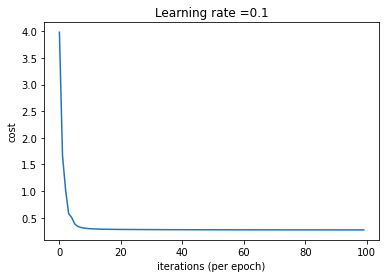

In [1171]:
sgd_backpropagation = network_new.batch_sgd_backprop(X,Y) #training using batch_sgd_backprop method of the class

In [1142]:
arr = [data_points,500,600,output_layer_size] #making the input arguments in the given format
network_new = network(arr) #passing the list and initializing the weights 
forward_pass = network_new.feed_forward(X) #calling the forward pass method 

4


loss after 0 : 5.464193451922486
loss after 1 : 1.0835974013866947
loss after 2 : 0.6131414578104781
loss after 3 : 0.4745379903695737
loss after 4 : 0.41824957669705
loss after 5 : 0.38949157833670944
loss after 6 : 0.37111998384053513
loss after 7 : 0.3587586646516038
loss after 8 : 0.34834414606077563
loss after 9 : 0.33914772749933314
loss after 10 : 0.33249181365973013
loss after 11 : 0.32605396142774823
loss after 12 : 0.3201890668830029
loss after 13 : 0.31542577754060375
loss after 14 : 0.31230918703130733
loss after 15 : 0.3088028825758887
loss after 16 : 0.3055751165085432
loss after 17 : 0.3032311697136546
loss after 18 : 0.30120724132728766
loss after 19 : 0.2991959844891921
loss after 20 : 0.29746378832580445
loss after 21 : 0.29607377784863165
loss after 22 : 0.2948983373364873
loss after 23 : 0.2935468733380672
loss after 24 : 0.29248918623580905
loss after 25 : 0.2915602419141918
loss after 26 : 0.29060258830747615
loss after 27 : 0.28979367720904486
loss after 28 : 0.2

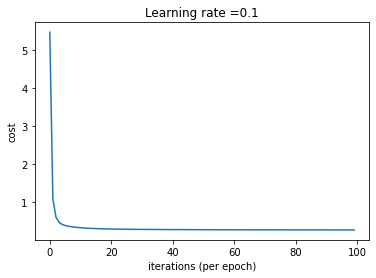

In [1143]:
single_backpropagation = network_new.single_example_backprop(X,Y) #training using single_example_backprop method of the class

In [1172]:
forward_pass = network_new.feed_forward(X) #testing using same input and forward propagation

In [1173]:
forward_pass[0]

array([[1.18327425, 0.32233094, 1.41507904, 0.4976472 ],
       [0.59371621, 0.33964942, 1.61142202, 1.10644708],
       [1.76792441, 0.        , 0.004842  , 2.21255543],
       [0.63562333, 0.02448867, 0.29244979, 0.05512703],
       [0.11708463, 0.22871245, 1.04051129, 1.09230261],
       [1.8703168 , 0.5117353 , 0.        , 1.97590546],
       [1.33498126, 3.18337686, 0.04676933, 0.        ],
       [0.80127666, 0.2265875 , 0.79707153, 0.80648416]])

In [1174]:
Y

array([[1.18574581, 0.32358361, 1.41397421, 0.49621066],
       [0.55745554, 0.32228346, 1.6372529 , 1.11809751],
       [1.76766375, 0.031297  , 0.00528467, 2.21268719],
       [0.62156476, 0.01821452, 0.30592892, 0.05512306],
       [0.11542194, 0.22798207, 1.04197003, 1.09291071],
       [1.8642064 , 0.5113272 , 1.47201267, 1.97652977],
       [1.33535055, 3.18363107, 0.04641874, 0.00702173],
       [0.82547619, 0.24321644, 0.78110122, 0.79788594]])

In [1181]:
error = np.square(forward_pass[0] - Y).mean() #error for the testing

In [1182]:
print("error is : {}".format(error))

error is : 0.06787295498749263
